In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [6]:
df_x=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Classify%20Points%20using%20Deep%20Learning/Logistic_X_Train.csv")
df_y=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Classify%20Points%20using%20Deep%20Learning/Logistic_Y_Train.csv")

In [7]:
df_x.head()

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [8]:
df_y.head()

,label
0,0
1,0
2,1
3,0
4,1


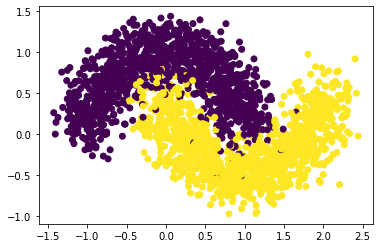

In [9]:
plt.scatter(df_x.iloc[:,0],df_x.iloc[:,1],c=df_y.iloc[:,0])

In [10]:
from keras import models
from keras.layers import Dense
#Length of X and Y should be shape
X=np.array(df_x) #Check shape of x
Y=np.array(df_y) #check shape of y
print(np.shape(X),np.shape(Y)) #print shape of Y,X

(2250, 2) (2250, 1)


In [11]:
model =models.Sequential()
model.add(Dense(20,activation='relu',input_shape=(1575,2)))
model.add(Dense(50,activation='tanh'))
model.add(Dense(100,activation='tanh'))
model.add(Dense(50,activation='tanh'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1575, 20)          60        
_________________________________________________________________
dense_1 (Dense)              (None, 1575, 50)          1050      
_________________________________________________________________
dense_2 (Dense)              (None, 1575, 100)         5100      
_________________________________________________________________
dense_3 (Dense)              (None, 1575, 50)          5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1575, 20)          1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1575, 1)           21        
Total params: 12,301
Trainable params: 12,301
Non-trainable params: 0
____________________________________________________

In [13]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42) #make a random split of 30% testing and 70% training
print(X_train.shape,Y_train.shape)

(1575, 2) (1575, 1)


In [14]:
hist= model.fit(X_train,Y_train,epochs=40,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/40
50/50 [==============================] - 0s 5ms/step - loss: 0.4424 - accuracy: 0.8114 - val_loss: 0.2547 - val_accuracy: 0.8874
Epoch 2/40
50/50 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.8832 - val_loss: 0.2215 - val_accuracy: 0.9170
Epoch 3/40
50/50 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.9003 - val_loss: 0.2007 - val_accuracy: 0.9230
Epoch 4/40
50/50 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9124 - val_loss: 0.1671 - val_accuracy: 0.9319
Epoch 5/40
50/50 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9276 - val_loss: 0.1563 - val_accuracy: 0.9378
Epoch 6/40
50/50 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.9340 - val_loss: 0.1137 - val_accuracy: 0.9556
Epoch 7/40
50/50 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.9492 - val_loss: 0.0966 - val_accuracy: 0.9719
Epoch 8/40
50/50 [==

In [16]:
output_train = model.predict(X_train)
output_train.shape

(1575, 1)

In [17]:
output_test = model.predict(X_test)
output_test.shape

(675, 1)